In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data=pd.read_csv('car data.csv')
pd.set_option('display.max_rows', None)

## EDA (Exploratory Data Analysis)

In [3]:
#checking null/missing values
raw_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

The above indicates that there is no null value present in dataset

In [4]:
#checking for duplicates
raw_data.duplicated().sum()

2

In [5]:
data_no_dup=raw_data.drop_duplicates()  #removing duplicates--2 records will be removed

In [6]:
data_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [7]:
data_no_dup.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,299,299.000000,299.000000,299.000000,299.000000,299,299,299,299.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,193,260,NaN
mean,NaN,2013.615385,4.589632,7.541037,36916.752508,NaN,NaN,NaN,0.043478
std,NaN,2.896868,4.984240,8.566332,39015.170352,NaN,NaN,NaN,0.248720
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.850000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.510000,6.100000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.840000,48883.500000,NaN,NaN,NaN,0.000000


In [8]:
#we observe from above table how there are 98 items 'car_name' column so for this categorical variable we need more 
#than 98 dummies,this many varying values won't help us in any prediction so we DROP 'car_name'

In [9]:
data=data_no_dup.drop(['Car_Name'],axis=1)
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Exploring PDFs of features
We check pdfs of all numerical features to deal with outliers

<Axes: xlabel='Year', ylabel='Density'>

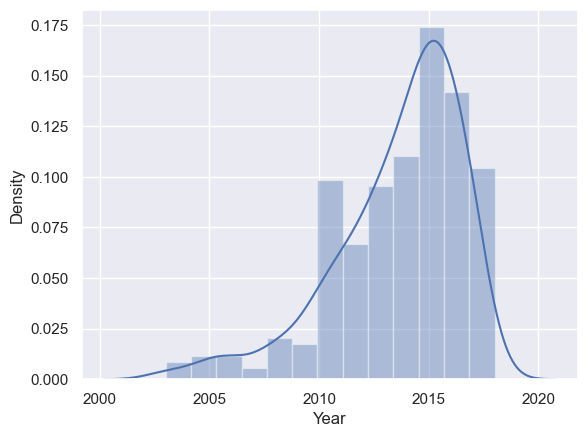

In [10]:
sns.distplot(data['Year'])

In [11]:
#removing outliers
q=data['Year'].quantile(0.01)
data1=data[data['Year']>q]

<Axes: xlabel='Year', ylabel='Density'>

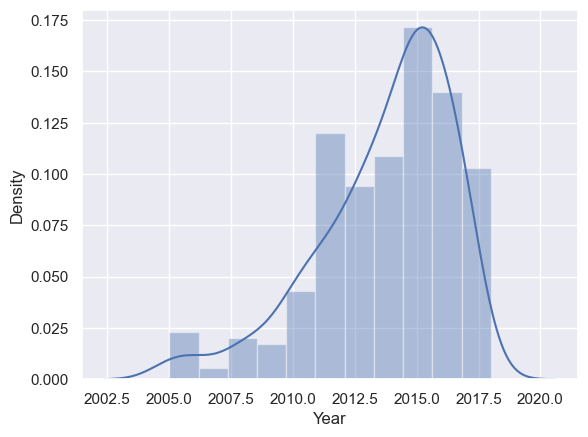

In [12]:
sns.distplot(data1['Year'])

<Axes: xlabel='Selling_Price', ylabel='Density'>

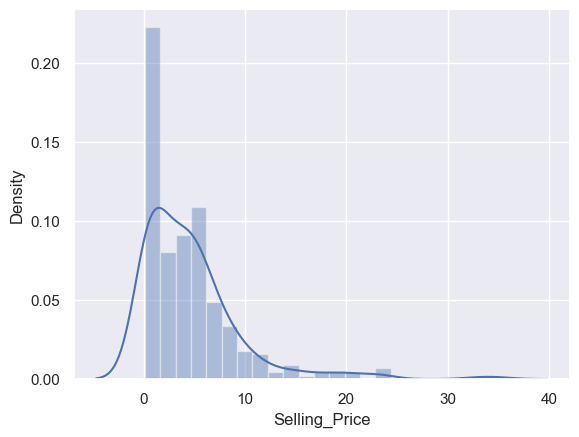

In [13]:
sns.distplot(data1['Selling_Price'])

In [14]:
q=data1['Selling_Price'].quantile(0.96)  
data2=data1[data1['Selling_Price']<q]

<Axes: xlabel='Selling_Price', ylabel='Density'>

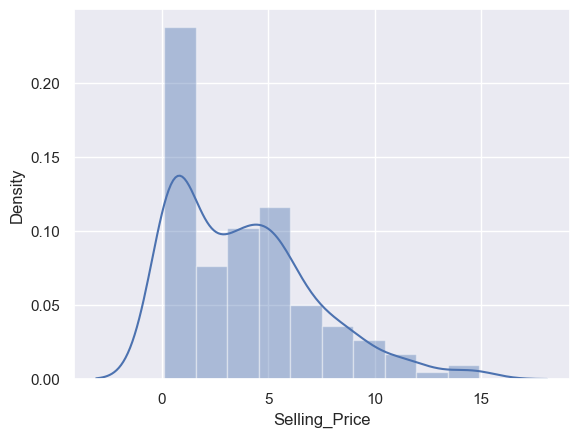

In [15]:
sns.distplot(data2['Selling_Price'])

<Axes: xlabel='Present_Price', ylabel='Density'>

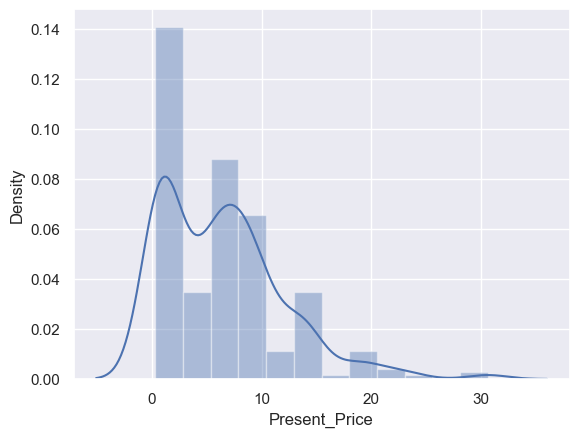

In [16]:
sns.distplot(data2['Present_Price'])

<Axes: xlabel='Present_Price', ylabel='Density'>

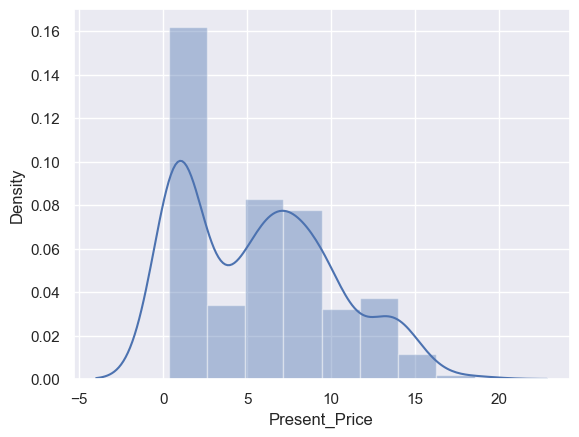

In [17]:
q=data2['Present_Price'].quantile(0.96)  
data3=data2[data2['Present_Price']<q]
sns.distplot(data3['Present_Price'])

<Axes: xlabel='Driven_kms', ylabel='Density'>

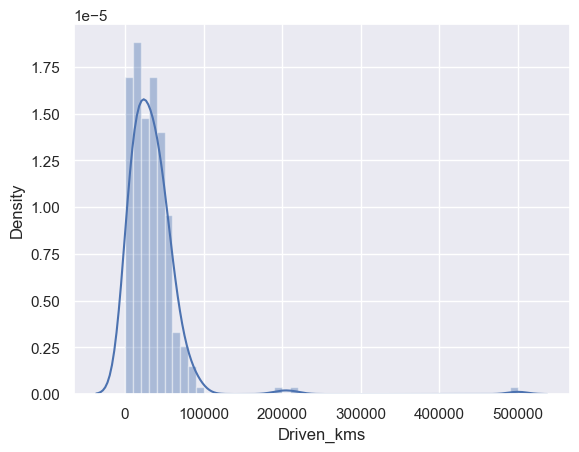

In [18]:
sns.distplot(data3['Driven_kms'])

<Axes: xlabel='Driven_kms', ylabel='Density'>

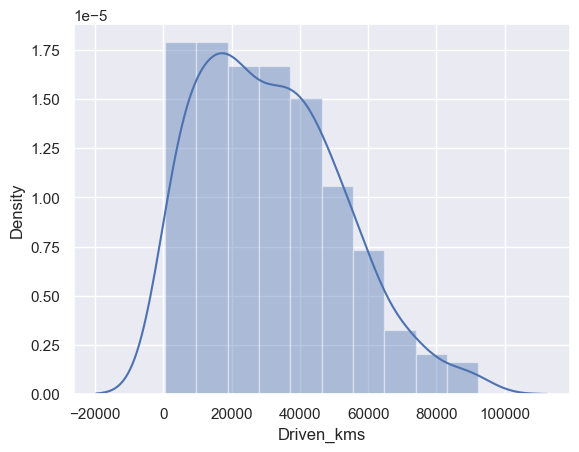

In [19]:
q=data3['Driven_kms'].quantile(0.99)  
data4=data3[data3['Driven_kms']<q]
sns.distplot(data4['Driven_kms'])

In [20]:
data4.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
#we can observe that 'owner' column won't be significant in the prediction of 'Selling_Price', so we drop it.

In [22]:
#dropping owner col 
data_cleaned=data4.drop(columns = 'Owner',axis = 1)

In [23]:
#resetting index
data_cleaned.reset_index(drop=True,inplace=True)

In [24]:
data_cleaned.describe(include='all')

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
count,268.000000,268.000000,268.000000,268.000000,268,268,268
unique,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual
freq,NaN,NaN,NaN,NaN,223,167,246
mean,2013.850746,3.698097,5.677015,31340.843284,NaN,NaN,NaN
std,2.599359,3.111863,4.388984,20543.132898,NaN,NaN,NaN
min,2005.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN
25%,2012.750000,0.750000,0.990000,15000.000000,NaN,NaN,NaN
50%,2015.000000,3.200000,5.705000,29611.500000,NaN,NaN,NaN
75%,2016.000000,5.500000,8.897500,45000.000000,NaN,NaN,NaN


In [25]:
#now all min-max and pdfs look fine, we've dropped the insignificant column and removed null/missing values
#we have preprocssed data and deleted about 30 observations.

In [26]:
#changing categorical variables to numerical format
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_vars = data_cleaned.select_dtypes('O').columns #to select all columns of object type
for col in cat_vars:
    
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])
data_cleaned.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,2,0,1
1,2013,4.75,9.54,43000,1,0,1
2,2017,7.25,9.85,6900,2,0,1
3,2011,2.85,4.15,5200,2,0,1
4,2014,4.60,6.87,42450,1,0,1


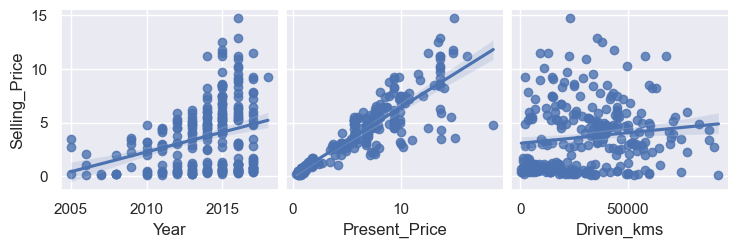

In [27]:
#to check the linearity assumption between each independent variable and the dependent variable
sns.pairplot(data_cleaned, x_vars=["Year", "Present_Price", "Driven_kms"], y_vars="Selling_Price", kind="reg")

In [28]:
#to check for multicollinearity among independent/dependent variables, we check throuh heatmap and 
#VIF(variance inflayion factor)

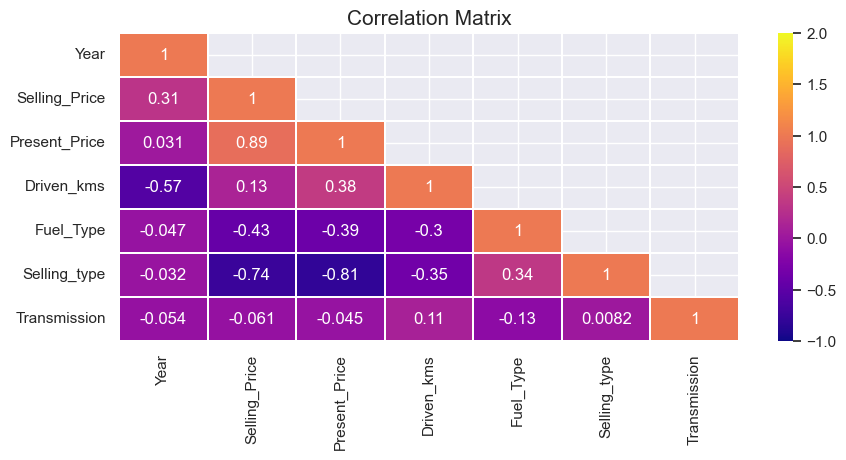

In [29]:
cor =data_cleaned.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='plasma')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Year','Driven_kms','Present_Price']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [31]:
vif

,VIF,features
0,3.934821,Year
1,3.879121,Driven_kms
2,3.122657,Present_Price


## Building Linear Regression Model

In [32]:
targets=data_cleaned['Selling_Price']
inputs=data_cleaned.drop(['Selling_Price'],axis=1)

In [33]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [34]:
inputs_scaled=scaler.transform(inputs)

In [62]:
#Train - Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

In [37]:
#Create the Regression

In [38]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [39]:
#lets store the predict values of TRAIN data
y_hat=reg.predict(x_train)

Text(0.5, 1.0, 'Residuals_pdf')

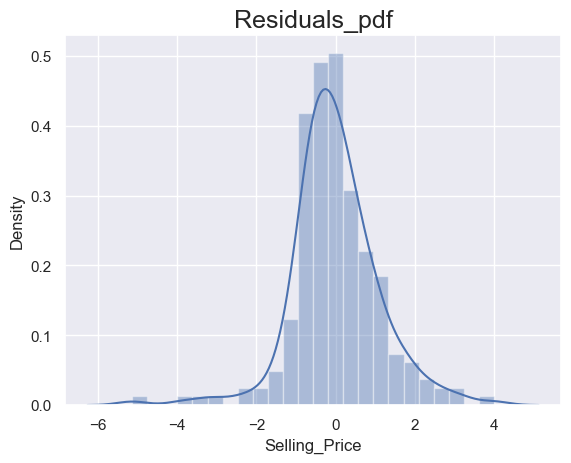

In [41]:
#lets comapre targets and predicted value using RESIDUAL PLOT 
sns.distplot(y_train-y_hat)
plt.title("Residuals_pdf",size=18)
sns.distplot(y_train-y_hat)
plt.title("Residuals_pdf",size=18)

In [42]:
#the above visualization also verifies the ASSUMPTION that errors are normally distributed,mean is 0

In [70]:
#calculating R-squared for training data
reg.score(x_train,y_train)  

0.8838560344800028

In [44]:
#R-squared is around 88% so our model explains around 88% of variability of data

In [73]:
data_cleaned.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,2,0,1
1,2013,4.75,9.54,43000,1,0,1
2,2017,7.25,9.85,6900,2,0,1
3,2011,2.85,4.15,5200,2,0,1
4,2014,4.60,6.87,42450,1,0,1


In [72]:
#finding weights and bias
print('Intercept : ',reg.intercept_)
reg_summary=pd.DataFrame(inputs.columns,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

Intercept :  3.7065089590384095


,Features,Weights
0,Year,0.61
1,Present_Price,2.54
2,Driven_kms,-0.39
3,Fuel_Type,-0.42
4,Selling_type,-0.23
5,Transmission,-0.06


In [74]:
#for Continuous variables,a positive weight shows that as feature increases its value,so does 'Selling_Price'
                        # a negative weight shows that as feature increases its value,'Selling_Price' decrease.

#for Categorical variables,a poitive weight shows that the respective category is more expensive than the benchmak
#A negative weight shows that the respective category is less expensive than the benchmak

### Testing

In [49]:
y_hat_test=reg.predict(x_test)   #finding predictions

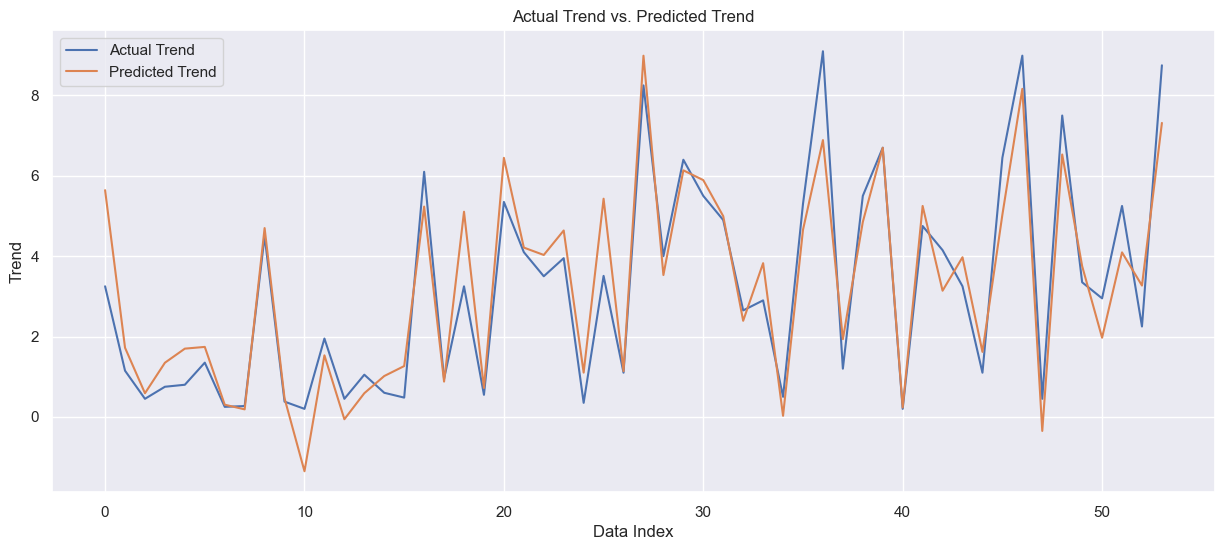

In [75]:
#let's compare target(actual) and predicted values using trend-lines
plt.figure(figsize=(15, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_hat_test, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()
print()

In [76]:
##calculating R-squared for testing data
reg.score(x_test,y_test)

0.8850958267217195

### R-squared is around 88.5% ~ 89%, so our model explains around 89% of variability of data